In [161]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model

In [162]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [163]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df.drop(df[df['annual_base_pay']>= 300000].index, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1420 non-null   float64
 1   annual_base_pay         1420 non-null   float64
dtypes: float64(2)
memory usage: 33.3 KB


In [165]:
df.describe()

,total_experience_years,annual_base_pay
count,1420.000000,1420.000000
mean,6.949880,100932.009873
std,5.353317,46193.158326
min,0.500000,16543.000000
25%,3.000000,65962.500000
50%,5.000000,100000.000000
75%,10.000000,130000.000000
max,43.000000,290000.000000


<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

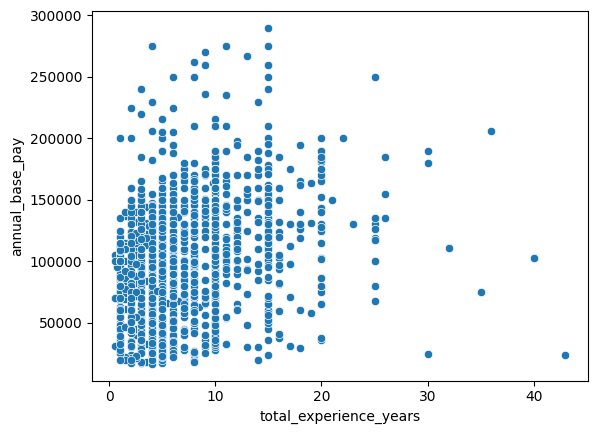

In [166]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [167]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

290000.0


In [168]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [169]:
train, test = testTrainSplit(df)

In [170]:
def sumOfDistances(a, b, c, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        gpa = trainDF.iat[row, 0]
        sat = trainDF.iat[row, 1]
        distance = abs((a*gpa) + (b*sat) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [171]:
def trainLinearRegression(trainDF):
    count = 0
    slopes = {}
    while count < 1000:
        a = random.randint(18000, 20000) # Slope!
        b = -1 # Coefficient to y --> by = ax + c --> negative because we move to other side
        c = 900 # Y-intercept
        count = count + 1
        sum = sumOfDistances(a, b, c, trainDF)
        slopes[a] = sum
    return slopes

In [172]:
trainSlopes = trainLinearRegression(train)
print(trainSlopes)

{19044: 3597.7496505745157, 19147: 3599.983569540444, 19101: 3598.988874184101, 19008: 3596.9631536922775, 19779: 3616.3415768532973, 18238: 3586.684460010414, 18440: 3587.75164114524, 18079: 3586.506388672502, 19345: 3604.4979770915747, 19071: 3598.3375746242664, 19136: 3599.746142660064, 19990: 3622.655991465148, 19400: 3605.987292116608, 18155: 3586.48430301438, 18062: 3586.5153172802916, 19250: 3602.2091670875884, 19656: 3613.0076611769455, 19222: 3601.596186989687, 18801: 3592.6500975722497, 19027: 3597.378620143293, 19117: 3599.335398120017, 19959: 3621.686239254066, 19068: 3598.272331951237, 19398: 3605.9317160044397, 19732: 3615.066496472513, 18980: 3596.349371193863, 18418: 3587.574428418226, 19818: 3617.409518050975, 18032: 3586.5311147155517, 18328: 3587.0812975852264, 19987: 3622.562275948218, 19521: 3609.3284610190394, 19753: 3615.636284537983, 19383: 3605.518244182669, 19393: 3605.7927255728227, 18439: 3587.743545892571, 19997: 3622.874551653466, 18903: 3594.666906042327,

In [173]:
temp = min(trainSlopes.values())
res = [key for key in trainSlopes if trainSlopes[key] == temp]
 
print("slope: " + str(res[0]))
print("distace: " + str(temp))

slope: 18135
distace: 3586.4770951815435
